In [1]:
"""
requirements:
 pip install pandas janome nlpplot matplotlib plotly
"""
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt
from pprint import pprint

import word_wakati as wkt

In [2]:
df = pd.read_csv('datasets/bachelor_themes.csv')
df.head()

,年度,学科／研究科,研究室,学籍番号,賞,氏名,要旨,題目
0,H17,情報科学科,相研,NaN,NaN,NaN,NaN,WEBページにおけるユーザビリティの追及
1,H17,情報科学科,松永研,NaN,NaN,NaN,NaN,安全運転管理教育システム(ASSIST)における複数カメラ使用での交通事故防止対策
2,H17,情報科学科,宮崎研,NaN,NaN,NaN,NaN,電子透かしの体制に関する検討 -加重平均フィルタ・メディアンフィルタの場合-
3,H17,情報科学科,成研,NaN,NaN,NaN,NaN,対面教育を支援するためのウェブ助言システム
4,H17,情報科学科,石田健研,NaN,NaN,NaN,NaN,衛星通信検討のための気象データの解析-2002年のデータ解析-


In [3]:
years = df["年度"].unique()
y, d = 5, 2 # loop for every 'y' years
for i in range(0,len(years)-y, d):
    print(years[i],years[i+y],)

H17 H22
H19 H24
H21 H26
H23 H28
H25 H30
H27 R02
H29 R04


In [4]:
len(df)

2148

In [5]:
fake_lab={'成研': 'A研', '石田健研': 'B研', '仲研': 'C研', '澤田研': 'D研', 
          '稲永研': 'E研', '合志研': 'F研', '米元研': 'G研', '朝廣研': 'H研', 
          '下川研': 'M研', '安部研': 'N研', 'アプドゥハン研': 'P研', '田中研': 'Q研', '安武研': 'R研'}
print(fake_lab.values())

dict_values(['A研', 'B研', 'C研', 'D研', 'E研', 'F研', 'G研', 'H研', 'M研', 'N研', 'P研', 'Q研', 'R研'])


# various graphs
- themeriver graph (mathplotlib.stackplots)
- knowledge structure graph

In [6]:
# %matplotlib inline
# import importlib
# importlib.reload(wkt)
targets = ['動詞', '名詞', '形容詞'] #評価対象にする品詞
ignores = ['－', '～', '-', '(', ')', '---', '.','する','ため','用いる','有する','用','使う'] #無視する記号や単語
mecab  = wkt.create_parser(worker='mecab',  parts_of_speech=targets, stop_words=ignores)

In [7]:
import collections

def ngram(words, n):
    lists = []
    m = len(words)
    if m > n:
        for i in range(n):
            lists += [ words[i:m-i+n] ]
        glist = list(zip(*lists))
    else:
        glist = words
        
    return [" ".join(g) for g in glist]

ngram(['a','b', 'c', 'd'], 2)

['a b', 'b c', 'c d']

In [8]:
def topk(df, i, j, topn, lab="研", stopwords=0):
    y1, y2 = years[i],years[j]
    df1 = None
    df1 = df[(df['研究室'].str.contains(lab)) & (df['年度']>=y1) & (df['年度']<=y2)]
    titles =  [ t[0] for t in df1.loc[:,['題目']].values]
    freq = collections.defaultdict(int)
    for text in titles:
        words = wkt.word_seq(text, parser=mecab)
        glist = ngram(words, 2)
#         print(glist)
        for g in glist:
            freq[g] += 1 
    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)   
    return freq[stopwords:topn+stopwords]

In [9]:
k, s, b = 60, 2, '研' 
i = 0 # 開始年
d = 3 # 間隔, 例：3年間
top_k = topk(df, i, i+d, k,lab=b, stopwords=s)
top1 = dict(top_k)
print(years[i],' ~ ',years[i+d])
pprint(top_k[:10])

i = 7
top_k = topk(df, i, i+d, k,lab=b, stopwords=s)
top2 = dict(top_k)
print(years[i],' ~ ',years[i+d])
pprint(top_k[:10])

i=14
top_k = topk(df, i,i+d,k,lab=b,stopwords=s)
top3 = dict(top_k)
print(years[i],' ~ ',years[i+d])
pprint(top_k[:10])


H17  ~  H20
[('安全運転 管理教育', 20),
 ('管理教育 システム', 20),
 ('システム ASSIST', 20),
 ('ドライビング シミュレータ', 16),
 ('管理 システム', 16),
 ('ソフトウェア 開発', 14),
 ('システム 構築', 13),
 ('交通 標識', 11),
 ('衛星 通信', 9),
 ('問題 メタヒューリスティクス', 9)]
H24  ~  H27
[('アプリケーション 開発', 16),
 ('教材 開発', 11),
 ('教材 作成', 10),
 ('安全運転 管理教育', 9),
 ('管理教育 システム', 9),
 ('システム ASSIST', 9),
 ('管理 システム', 8),
 ('設計 開発', 8),
 ('シミュレータ 開発', 8),
 ('Web アプリケーション', 8)]
R01  ~  R04
[('公共 交通', 26),
 ('機能 開発', 25),
 ('性能 評価', 17),
 ('ドライビング シミュレータ', 17),
 ('支援 システム', 16),
 ('交通 基盤', 15),
 ('基盤 データ', 15),
 ('シミュレータ 開発', 15),
 ('安全運転 管理教育', 13),
 ('管理教育 システム', 13)]


In [10]:
# long-term popular
common = top1.keys() & top2.keys() & top3.keys()

#short-term popular
com12 = top1.keys() & top2.keys() - common 
com13 = top1.keys() & top3.keys() - common
com23 = top2.keys() & top3.keys() - common
print("common")
pprint(common)
pprint("com12")
pprint(com12)
pprint("com13")
pprint(com13)
pprint("com23")
pprint(com23)


common
{'システム ASSIST',
 'システム 試作',
 'シミュレータ 開発',
 'ドライビング シミュレータ',
 '安全運転 管理教育',
 '機能 開発',
 '管理 システム',
 '管理教育 システム'}
'com12'
{'伝搬 シミュレータ', '設計 開発', '電磁波 伝搬', 'システム 設計'}
'com13'
{'教育 ドライビング', 'データ 解析', '性能 評価'}
'com23'
{'FDTD 法', '教材 開発', '教材 作成', '走行 体', 'Web アプリケーション', 'アプリケーション 開発'}


In [11]:
only1 = top1.keys() - top2.keys() - top3.keys()
only2 = top2.keys() - top1.keys() - top3.keys()
only3 = top3.keys() - top1.keys() - top2.keys()
print("only1\n",only1)
print("only2\n",only2)
print("only3\n",only3)

only1
 {'声道 模型', 'CBT システム', '型 衛星', 'サーバ 構築', 'システム 作成', 'KM 式', 'クラスタ コンピューティング', '省エネルギー 対策', '業務 プロセス', '道路標識 認識', '対策 立案', '認識 研究', '試作 評価', '動的 挙動', '安全運転 助言', 'セマンティック グリッド', '研究 時間', 'ソフトウェア 開発', '電力 計測', '衛星 通信', '通信 検討', '挙動 解析', '助言 検査', '標識 抽出', '型 KM', '問題 メタヒューリスティクス', '講義 記録', '計測 基づく', '実験的 解析', '運転 行動', '時間 記録', 'システム 構築', '式 安全運転', '基づく 省エネルギー', 'マルチ ビーム', '交通 標識', '教育支援 環境', 'コンピューティング 教育支援', 'ビーム 型', '記録 システム', '組合せ最適化 問題', '経路 探索', 'メタヒューリスティクス 実験的', 'システム開発 演習', '方式 研究'}
only2
 {'消費電力 削減', 'フィードバック 条件下', '遅延 聴覚', '削減 方式', '作成 支援', '方法 検討', '教育 教材', 'スマートフォン 向け', '自動 生成', 'Android 端末', 'web Mathematica', '二輪 倒立振子', 'ハイブリッド クラウド', '設計 実装', 'アプリケーション 試作', '環境 作成', 'イベント 履歴', '水中 集魚灯', 'モデル 計算機', 'Android アプリケーション', '機能 追加', '学習 支援ツール', 'ツール 開発', 'シミュレータ 作成', '計算機 KERNEL', 'スマート タップ', '九州産業大学 情報科学部', 'KERNEL 更新', '対話 型', 'クラウド 環境', '自律 型', '計画 方式', 'シフト 管理', '支援ツール 作成', 'LED 水中', '利用 2次元', '生成 システム', '時間割 作成', 'アプリ 開発', 'Mathematica 健康', 'K 16', '聴覚 フィードバック'}
only3
 {

In [12]:
import random

topics = [
# common
     'ドライビング シミュレータ', '機能 開発', '安全運転 管理教育', 'システム 試作'
    ,'マイクロ波 誘電体', '車 エージェント', '地域 公共','データ 作成', 'ゲート パルス'
     ,'電磁波 伝搬', '設計 開発', 'システム 設計','性能 評価', 'データ 解析'
    ,'計算機 KERNEL','イベント 履歴', '計画 方式', '簡易 脳波計'
     ,'教材 作成', '水中 集魚灯','走行 体', 'Web アプリケーション', 'FDTD 法'
    ,'衛星 通信', '標識 抽出','マルチ ビーム','業務 プロセス'
]

base = topics

random.shuffle(base)

k, s, b = 60, 1, '研' 
d = 3
x = years[d:len(years)]
y = []
for i in range(len(years)-d):
    print(years[i],'-', years[i + d])
    freq = {key:0 for key in base}
    top_k = topk(df,i, i+d, k,lab=b, stopwords=s)
    for key,val in top_k:
        if key in base:
            freq[key] = val
#     print(freq)
    y += [freq.values()]
print(x)
print(y[0:2])

H17 - H20
H18 - H21
H19 - H22
H20 - H23
H21 - H24
H22 - H25
H23 - H26
H24 - H27
H25 - H28
H26 - H29
H27 - H30
H28 - R01
H29 - R02
H30 - R03
R01 - R04
['H20' 'H21' 'H22' 'H23' 'H24' 'H25' 'H26' 'H27' 'H28' 'H29' 'H30' 'R01'
 'R02' 'R03' 'R04']
[dict_values([0, 20, 16, 0, 7, 0, 7, 0, 0, 0, 0, 8, 0, 0, 5, 0, 7, 6, 0, 0, 0, 5, 8, 8, 0, 9, 8]), dict_values([0, 19, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 5, 5, 0, 0, 0, 4, 8, 7, 0, 7, 4])]


In [13]:
print(list(zip(base,y[0])))
# print(list(zip(base,y[1])))
# print(list(zip(base,y[2])))

[('計算機 KERNEL', 0), ('安全運転 管理教育', 20), ('ドライビング シミュレータ', 16), ('計画 方式', 0), ('標識 抽出', 7), ('マイクロ波 誘電体', 0), ('性能 評価', 7), ('走行 体', 0), ('車 エージェント', 0), ('水中 集魚灯', 0), ('簡易 脳波計', 0), ('データ 解析', 8), ('イベント 履歴', 0), ('FDTD 法', 0), ('マルチ ビーム', 5), ('データ 作成', 0), ('設計 開発', 7), ('システム 設計', 6), ('ゲート パルス', 0), ('Web アプリケーション', 0), ('地域 公共', 0), ('業務 プロセス', 5), ('電磁波 伝搬', 8), ('システム 試作', 8), ('教材 作成', 0), ('衛星 通信', 9), ('機能 開発', 8)]


In [14]:
print(len(base))
print(len(y[0]))
# collections.Counter(base).most_common(1) 

27
27


In [15]:
from  matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans CJK JP'

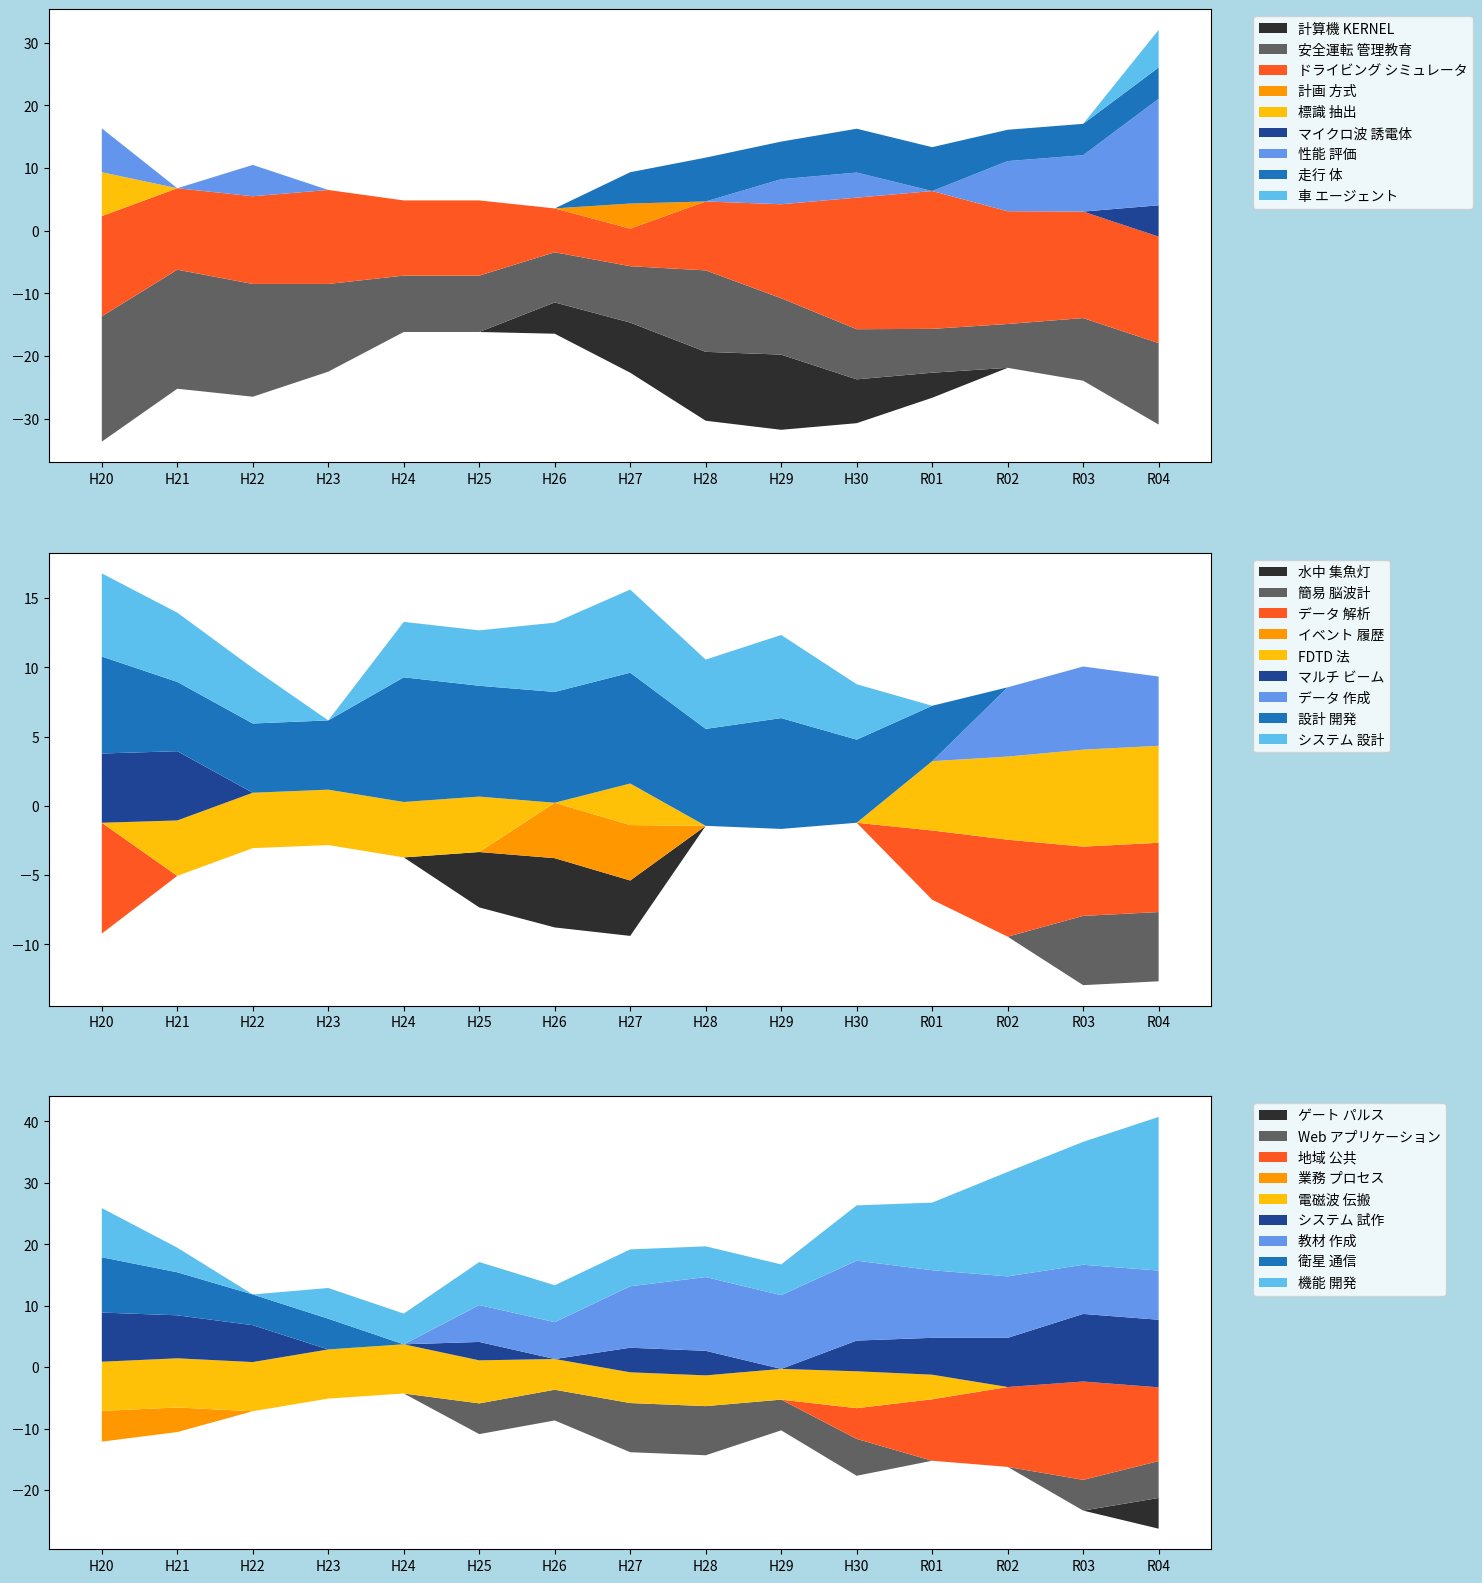

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,20], facecolor='lightblue')
y_axis = [ [list(t)[i] for t in y ] for i,_ in enumerate(base)]

ax = []
n_fig = 3

for i in range(n_fig):
    ax.append(fig.add_subplot(n_fig,1,i+1) )

d = 9

# Color patterns for keywords in stackplot
# cf. https://saruwakakun.com/design/gallery/palette

# pattern 1: system default
colors1 = None  # default colors

# pattern 2: dark
colors2=['#2E2E2E', '#626262', '#FF5722', '#FF9800', '#FFC107', 
        '#204495', '#6495ED', '#1C75BC', '#5CC0EF']

# pattern 3 : light
colors3=['#F6E5D7', '#73D0C2', '#ED8D49', '#FFC530', '#978D86',
        '#E85A70', '#4EA1D5', '#AAA5D1', '#454552']

for i in range(n_fig):
    labels = list(base)[i*d:(i+1)*d]
    ax[i].stackplot(x, *(y_axis[i*d:(i+1)*d]), labels=labels, colors=colors2, baseline='wiggle')
    # ax[i].legend(loc='best')
    ax[i].legend(bbox_to_anchor=(1.03, 1.0), loc='upper left')
    # ax[i].set_xlabel('年度')
    # ax[i].set_ylabel('使用頻度')

plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('datasets/bachelor_themes.csv')
i, j, lab = 0, 10, '研'
y1, y2 = years[i],years[j]
df1 = None
df1 = df[(df['年度']>=y1) & (df['年度']<=y2)]
titles =  [ t[0] for t in df1.loc[:,['題目']].values]
themes = []
for text in titles:
    words = wkt.word_seq(text, parser=mecab)
    themes += [" ".join(words)]
# print(themes)

model = TfidfVectorizer(ngram_range=(1, 1))
X = model.fit_transform(themes)

# When sklearn.__version__ <= 0.24.x use get_feature_names() 
# When sklearn.__version__ >= 1.0.x use get_feature_names_out() 
df_series = pd.DataFrame(X.toarray(), columns=model.get_feature_names_out())

keywords = df_series.max().sort_values(ascending=False)

keywords.head(10)

リアルタイムサウンドマスキング        1.000000
ボクセルカラーリングツール          0.955348
セマンティックグリッドシミュレーション    0.899419
rfid                   0.843541
車両                     0.833846
強化                     0.806889
似顔絵                    0.788598
アンケート調査                0.780770
ソーシャルリンクサービス           0.780277
ビジュアルタグ                0.778920
dtype: float64

In [18]:
print(len(keywords))
for s, v in keywords.items():
    print(f'{str(s).upper()}\t{v:.3f}')
    if v < 0.8:
        break

2079
リアルタイムサウンドマスキング	1.000
ボクセルカラーリングツール	0.955
セマンティックグリッドシミュレーション	0.899
RFID	0.844
車両	0.834
強化	0.807
似顔絵	0.789
